In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [6]:
!kaggle datasets download -d nowke9/ipldata

ipldata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!ls

ipldata.zip  kaggle.json


In [10]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
  inflating: deliveries.csv          
  inflating: matches.csv             


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [13]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [14]:
data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [15]:
data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [20]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [27]:
data2.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

**First let's unite Delhi, as it was Daredevils before**

In [22]:
data.batting_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data.bowling_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [23]:
data2.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [59]:
data2.toss_winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)


In [60]:
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Let's go on now -**
**MI V DC**

In [61]:
data_f = data2.loc[data2.team1.isin(['Mumbai Indians', 'Delhi Capitals'])] 
data_f = data_f.loc[data_f.team2.isin(['Mumbai Indians', 'Delhi Capitals'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
81,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
108,109,2008,Delhi,2008-05-24,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,KD Karthik,Feroz Shah Kotla,BF Bowden,K Hariharan,NaN
149,150,2009,East London,2009-05-08,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Delhi Capitals,0,7,A Nehra,Buffalo Park,M Erasmus,SK Tarapore,NaN
169,170,2009,Centurion,2009-05-21,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,4,V Sehwag,SuperSport Park,IL Howell,S Ravi,NaN
182,183,2010,Delhi,2010-03-17,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,98,0,SR Tendulkar,Feroz Shah Kotla,BR Doctrove,SK Tarapore,NaN
220,221,2010,Mumbai,2010-04-13,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Mumbai Indians,39,0,KA Pollard,Brabourne Stadium,S Asnani,DJ Harper,NaN
237,238,2011,Delhi,2011-04-10,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,normal,0,Mumbai Indians,0,8,SL Malinga,Feroz Shah Kotla,AM Saheba,RB Tiffin,NaN
281,282,2011,Mumbai,2011-05-07,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,32,0,AT Rayudu,Wankhede Stadium,K Hariharan,SJA Taufel,NaN


Finally , We have got a complete dataset for all the matches of  Delhi V Mumbai 

**Let's do Q1 now**

Mumbai Wins - 12
Delhi Wins - 12


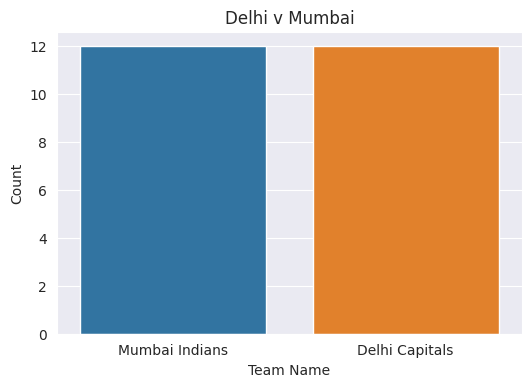

In [65]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Count')
plt.xlabel('Team Name')
plt.title('Delhi v Mumbai')
A,B =data_f.winner.value_counts()

print('Mumbai Wins -',A)
print('Delhi Wins -',B)

plt.show()


Well, I got it correct , crosschecked this record on Google

But , 1 Question can't be solved on this as they have 50-50 percent record back

As Delhi is performing well till now 

Let's mark Delhi there

For Question 2 , There can't be much analysis performed.

As match is in AbuDhabi, today KKR won by batting first there.

So, I hope tomorrow winning captain will choose to bat first.

**For Q3, Let's analyze Rohit Sharma's record v Delhi Capitals**

In [66]:
data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [83]:
data_h = data.loc[data.batting_team.isin(['Mumbai Indians'])]
data_h = data_h.loc[data.bowling_team.isin(['Delhi Capitals'])]
data_h = data_h.loc[data.batsman.isin(['RG Sharma'])]
data_h


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5547,24,1,Mumbai Indians,Delhi Capitals,6,2,RG Sharma,N Rana,CH Morris,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
5548,24,1,Mumbai Indians,Delhi Capitals,6,3,RG Sharma,N Rana,CH Morris,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
5549,24,1,Mumbai Indians,Delhi Capitals,6,4,RG Sharma,N Rana,CH Morris,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
5550,24,1,Mumbai Indians,Delhi Capitals,6,5,RG Sharma,N Rana,CH Morris,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
5551,24,1,Mumbai Indians,Delhi Capitals,6,6,RG Sharma,N Rana,CH Morris,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172788,11325,1,Mumbai Indians,Delhi Capitals,6,1,RG Sharma,Q de Kock,K Paul,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
172789,11325,1,Mumbai Indians,Delhi Capitals,6,2,RG Sharma,Q de Kock,K Paul,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
172793,11325,1,Mumbai Indians,Delhi Capitals,6,6,RG Sharma,Q de Kock,K Paul,0,0,0,0,1,0,7,1,8,NaN,NaN,NaN
172794,11325,1,Mumbai Indians,Delhi Capitals,6,7,RG Sharma,Q de Kock,K Paul,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [76]:
data_h.batsman.value_counts()

RG Sharma       426
AT Rayudu       276
SR Tendulkar    264
KA Pollard      239
KH Pandya       130
               ... 
MG Johnson        3
L Ronchi          3
M de Lange        2
RJ Peterson       2
TG Southee        1
Name: batsman, Length: 62, dtype: int64

In [84]:
data_h.batsman_runs.sum() # Sum of Rohit's score

563

Well, as per our dataset Rohit has scored a total of 563 runs against Delhi but I googled it and got that he has scored 745 runs.

So, may be we have an error in our data and there is no benefit of finding average now as it will also be wrong than the result.





**Let's move on to Q4 now**

Let's find Rabada's Record v MI


In [89]:
data_k = data.loc[data.batting_team.isin(['Mumbai Indians'])]
data_k = data_k.loc[data.bowling_team.isin(['Delhi Capitals'])]
data_k = data_k.loc[data.bowler.isin(['K Rabada'])]
data_k

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5512,24,1,Mumbai Indians,Delhi Capitals,1,1,PA Patel,JC Buttler,K Rabada,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
5513,24,1,Mumbai Indians,Delhi Capitals,1,2,JC Buttler,PA Patel,K Rabada,0,5,0,0,0,0,0,5,5,NaN,NaN,NaN
5514,24,1,Mumbai Indians,Delhi Capitals,1,3,JC Buttler,PA Patel,K Rabada,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
5515,24,1,Mumbai Indians,Delhi Capitals,1,4,PA Patel,JC Buttler,K Rabada,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
5516,24,1,Mumbai Indians,Delhi Capitals,1,5,JC Buttler,PA Patel,K Rabada,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172877,11325,1,Mumbai Indians,Delhi Capitals,20,4,HH Pandya,KH Pandya,K Rabada,0,0,0,0,0,0,0,0,0,HH Pandya,caught,RR Pant
172878,11325,1,Mumbai Indians,Delhi Capitals,20,5,KH Pandya,KA Pollard,K Rabada,0,1,0,0,0,0,1,1,2,NaN,NaN,NaN
172879,11325,1,Mumbai Indians,Delhi Capitals,20,6,KH Pandya,KA Pollard,K Rabada,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
172880,11325,1,Mumbai Indians,Delhi Capitals,20,7,KH Pandya,KA Pollard,K Rabada,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


As we don't have any column for wicket taken we need to find the Rabada's wicket against MI by the use of player dismissed column

In [90]:
data_k.player_dismissed.value_counts()

AS Yadav           1
BCJ Cutting        1
Yuvraj Singh       1
HH Pandya          1
Harbhajan Singh    1
PA Patel           1
RG Sharma          1
Name: player_dismissed, dtype: int64

It seems that Rabada's has taken only 7 wickets agains MI 

Although he has been phenomenal this season

Let's expect to be him bang tomorrow too.

**Let's move to Q5 now**

In [92]:
data_w = data.loc[data.batting_team.isin(['Mumbai Indians','Delhi Capitals'])]
data_w = data_w.loc[data.bowling_team.isin(['Delhi Capitals','Mumbai Indians'])]
data_w

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5512,24,1,Mumbai Indians,Delhi Capitals,1,1,PA Patel,JC Buttler,K Rabada,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
5513,24,1,Mumbai Indians,Delhi Capitals,1,2,JC Buttler,PA Patel,K Rabada,0,5,0,0,0,0,0,5,5,NaN,NaN,NaN
5514,24,1,Mumbai Indians,Delhi Capitals,1,3,JC Buttler,PA Patel,K Rabada,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
5515,24,1,Mumbai Indians,Delhi Capitals,1,4,PA Patel,JC Buttler,K Rabada,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
5516,24,1,Mumbai Indians,Delhi Capitals,1,5,JC Buttler,PA Patel,K Rabada,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173000,11325,2,Delhi Capitals,Mumbai Indians,20,2,K Rabada,A Mishra,HH Pandya,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
173001,11325,2,Delhi Capitals,Mumbai Indians,20,3,K Rabada,A Mishra,HH Pandya,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
173002,11325,2,Delhi Capitals,Mumbai Indians,20,4,K Rabada,A Mishra,HH Pandya,0,0,0,0,0,0,0,0,0,K Rabada,caught,KA Pollard
173003,11325,2,Delhi Capitals,Mumbai Indians,20,5,A Mishra,I Sharma,HH Pandya,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [93]:
data_w.wide_runs.sum()

227

In [94]:
227/24

9.458333333333334

So, On an average in DC v MI match , There are 9-10 wide ball runs.

Thank You Widhya and Rahul Sir for this amazing internship

When I saw it , I was just like WOW! , What an Idea!

Regards,

Ashaab Rizvi

